### API
1. Sign Up with google
2. Uber vs google maps
3. API key

### Application Prgram Interface
Softwares talk to each other
importing pandans and making dataframe means we use Pandas APIs to access its funtions <br>
#### REST APIs
REpresentational State Transfer APIs <br>
1. REST APIs are used to interact with web services, that is applications that you call through the internet
2. The have a set of rules regarding:
   1. Communication
   2. Inpurt or Request
   3. Output or Response
HTTP : Request JSON: like Dictionary <br>
HTTP: Response JSON: like Dictionay<br>
Using pycoingecko <br>
!pip install pycoingecko <br>
from pycoingecko import CoinGeckoAPI <br>
cg = CoinGeckoAPI() <br>
bitcoin_data =

In [2]:
# Pandas is an API
# Pandas is actually set of software components, much of which is not even written in python.
import pandas as pd
import matplotlib.pyplot as plt
dict_ = {
    'a': [11, 21, 31],
    'b': [12,22,32]
}

In [3]:
df = pd.DataFrame(dict_)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,a,b
0,11,12
1,21,22
2,31,32


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width="800," align="center" alt="logistic regression block diagram">


In [6]:
!pip install nba_api

In [7]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [8]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = {key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [9]:
nba_teams = teams.get_teams()

In [10]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [11]:
dict_nba_team = one_dict(nba_teams)
df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [12]:
df_warriors = df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [13]:
id_warriors = df_warriors[['id']].values[0,0]

In [14]:
id_warriors

np.int64(1610612744)

In [15]:
from nba_api.stats.endpoints import leaguegamefinder

In [16]:
Since https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is commented out, you can run it on jupyter labs on your own computer.
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

SyntaxError: invalid syntax (1029683917.py, line 1)

In [17]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")


In [18]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [19]:
games_home=games[games['MATCHUP']=='GSW vs. TOR']
games_away=games[games['MATCHUP']=='GSW @ TOR']

In [20]:
games_home['PLUS_MINUS'].mean()

np.float64(3.730769230769231)

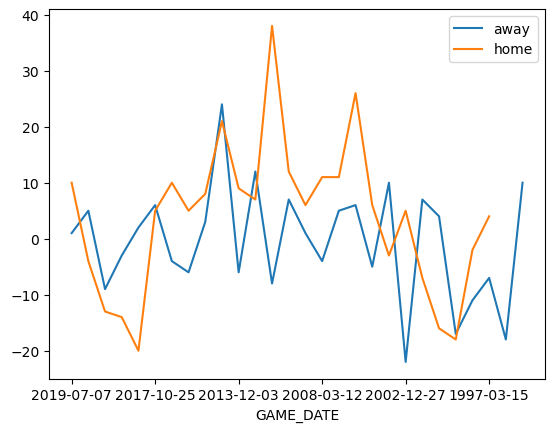

In [21]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

### REST APIs & HTTP Requests - Part 1
- Scheme: http://
- Internet address or Base URL: www.gitlab.com
- Route: location on the web server, /images/IDSNlogo.png
- http://www.ibm.com/images/IDSNlogo.png

**Request Message**
| Requests | Description |
| ---------| ----------|
| Request start line | Get/index.html HTTP/1.0 |
| Request header | user-Agent: python-requests/2.25.0 Accept-Encoding: gzip, default |
|Request body | we will see it further |

**Response Message**
| Response | Descripition |
| --------- | ---------|
| Response start line | HTTP/1.0 Ok |
| Response Header | server: Apache-Cache: Ucachable |
| Respone Body | < !DOCTYPE htm > |

**Status code**
| code | work|
| --------| ------|
| 1xx | informational |
| 100 | everything is so far Ok |
| 2xx | success |
| 200 | Okay |
| 3xx | Redirection |
| 300 | Multiple choices |
| 4xx | client error |
| 401 | unauthorized |
| 402 | Forbidden |
| 403 | Not found |
| 500 | serveer error |

### REST APIs & HTTP Requests - Part 2
- Requests in python
- Get requests
- Post requests

In [23]:
import requests
url = 'https://www.ibm.com/'
r = requests.get(url)
r.status_code

200

In [24]:
r.request.headers

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate, br, zstd', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=461B7EFE899F3376DC9AD30B2FD37FD2~-1~YAAQJMXOF0P9CCeaAQAAa1ntPQ74IZg5aUi5Coja90emgOX9Cnl6xVdqYB9L7YgqP8GoiVoPy8l7QFeeOlekTTXtqL+LseAZoNM9HRt8H42s2d3ouKzG+QjQVq1PlYuaCnc3NSoU3Qby70sxuhy8NsKjdC0tiv4yz1ZE2f6CT2E5JXuDXCZ/ujvRiAr1ecntjpiAr0kUqvBKfghtgItB/lNjPd+LrIUhbZCV2yEoFH+bAmqUuBFgqSc3f/rchCB/1kRHhQa+rKmTfyjbbm4QfV6SzNxJOh/6yg8k4Lk9WHYv8oib/bJG6Vm3mEXke/mwicAthXjmlMmGGKR5B7sFcBtNfSSsh79t0yBtSxxK6zluV2aIZJxEzIeAMve2wknpF7LTh+rhGDNYF9Dil5tVzNkQ0xXSTH9NZg2TBKrN3jJLicyfIH8sZ2zGKVw1g4QQ6wk=~-1~-1~-1~-1~-1; bm_sz=214B4FFF0CC190A3194DE3BC384017C4~YAAQJMXOF0T9CCeaAQAAa1ntPR2zBzQZHMo9rViEvYdiovAD66zABNI/6ksdPgXRCVNUOCMuzBrOUuNaOMJCWBIAORmQ1ewtrH45CNZpiaBUK4gUxddlmSIKb3pNcxZL6EWvMH1Pl8A8mvsTeHuGN7JzBhcXZH+BabUoDin/VAJqrZBcxLouxp6sKBdvOKcZQSBuLR0GljePAmyN2qN0+Jx3ybTDEskeGd12rdo/3xxbix0NCEc+Bx7Xnb+zcpjaskaJzzrxksvM/pNKWWsaxd39dnmWt3x2WLeLX5UmfiF6t/3lxpe

In [25]:
r.headers

{'Content-Security-Policy': 'upgrade-insecure-requests', 'x-frame-options': 'SAMEORIGIN', 'Last-Modified': 'Sat, 01 Nov 2025 05:10:52 GMT', 'ETag': '"2ed99-64281819501de-gzip"', 'Accept-Ranges': 'bytes', 'Content-Type': 'text/html;charset=utf-8', 'X-Content-Type-Options': 'nosniff', 'Cache-Control': 'max-age=600', 'Expires': 'Sat, 01 Nov 2025 05:49:17 GMT', 'X-Akamai-Transformed': '0 - 0 -', 'Content-Encoding': 'gzip', 'Date': 'Sat, 01 Nov 2025 05:39:17 GMT', 'Content-Length': '37825', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Strict-Transport-Security': 'max-age=31536000'}

In [26]:
rr = requests.get('https://tradeconnection.site/')
rr.status_code

200

In [27]:
rr.headers

{'date': 'Sat, 01 Nov 2025 05:41:53 GMT', 'content-type': 'text/html; charset=UTF-8', 'vary': 'Accept-Encoding, Accept-Encoding', 'server': 'Apache', 'x-powered-by': 'PHP/8.2.29', 'link': '<https://tradeconnection.site/wp-json/>; rel="https://api.w.org/", <https://tradeconnection.site/wp-json/wp/v2/pages/100>; rel="alternate"; title="JSON"; type="application/json", <https://tradeconnection.site/>; rel=shortlink', 'cache-control': 'public, s-maxage=216000', 'x-stackcache-cacheable': 'yes', 'x-cache-enabled': 'true', 'x-provided-by': 'StackCDN', 'x-origin-cache-status': 'HIT', 'content-encoding': 'gzip', 'x-via': 'LHR6', 'x-cdn-node-is-at-origin': '1', 'x-cdn-cache-status': 'HIT', 'transfer-encoding': 'chunked'}

In [29]:
rr.request.body

In [30]:
rr.encoding

'UTF-8'

In [31]:
rr.text[0:100]

'<!DOCTYPE html>\n<html lang="en-US">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="wid'

In [32]:
http://httpbin.org/get

SyntaxError: invalid syntax (861996014.py, line 1)

In [33]:
url_get = 'http://http.org/get'
payload = {'name': "Awais", 'Id': '1223'}
r = requests.get(url_get, params=payload)

In [34]:
r

<Response [522]>

In [35]:
r.url

'https://http.org/get?name=Awais&Id=1223'

In [36]:
r.text

'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->\n<head>\n\n<title>http.org | 522: Connection timed out</title>\n<meta charset="UTF-8" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="robots" content="noindex, nofollow" />\n<meta name="viewport" content="width=device-width,initial-scale=1" />\n<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/main.css" />\n</head>\n<body>\n<div id="cf-wrapper">\n    <div id="cf-error-details" class="p-0">\n        <header class="mx-auto pt-10 lg:pt-6 lg:px-8 w-240 lg:w-full mb-8">\n            <h1 class="inline-block sm:block sm:mb-2 font-light text-60 lg:text-4xl text-black-dark

In [37]:
r.headers['Content-Type']

'text/html; charset=UTF-8'

In [39]:
url_post = "http://httpbin.org/post"
payload = {"name": "Awais", "ID":"2323"}
r_post = requests.post(url_post, data=payload)

In [40]:
print("Post request URL: ", r_post.url)
print("GET request URL: ", r.url)

Post request URL:  http://httpbin.org/post
GET request URL:  https://http.org/get?name=Awais&Id=1223


![Image](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/Webpage.png)


<table>
    <tr>
        <td> Row 1 Column 1</td>
        <td> Row1 Column 2</td>
        <td>Row1 Column 3</td>
    </tr>
    <tr>
        <td>Row2 Column 1</td>
        <td>Row2 Column 2</td>
        <td>Row2 coumn 3</td>
    </tr>
</table>


In [41]:
# Import Beautiful Soup to parse the web page content
from bs4 import BeautifulSoup

In [42]:
import requests
from bs4 import BeautifulSoup

# Specify the URL of the webpage you want to scrape
url = 'https://en.wikipedia.org/wiki/IBM'

# Send an HTTP GET request to the webpage
response = requests.get(url)

# Store the HTML content in a variable
html_content = response.text

# Create a BeautifulSoup object to parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Display a snippet of the HTML content
print(html_content[:500])

Please set a user-agent and respect our robot policy https://w.wiki/4wJS. See also T400119.



C:\Users\awais\AppData\Local\Temp\ipykernel_8440\413523313.py:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html_content, 'html.parser')


In [43]:
# Find all <a> tags (anchor tags) in the HTML
links = soup.find_all('a')

# Iterate through the list of links and print their text
for link in links:
    print(link.text)

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/reqest_messege.png" width="400" align="center">
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/http_methods.png" width="400" align="center">
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/response_message.png" width="400" align="center">
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
         <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/status_code.png" width="300" align="center">
</div>


In [44]:
import os
from PIL import Image
from IPython.display import IFrame

In [45]:
url = 'https://www.ibm.com'
r= requests.get(url)
r.status_code

200

In [46]:
print(r.request.headers)

{'User-Agent': 'python-requests/2.32.3', 'Accept-Encoding': 'gzip, deflate, br, zstd', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': '_abck=D9507F9C2B92ADD5D469234987392AAC~-1~YAAQJMXOFyxDCSeaAQAAze0TPg6rdiUsRE/R4mAq4E3wpcwGaL/EPkhM+PbTLvBb3avqaESIlasMhrGJheOwiFDXCPG4jWR6znkIoC378EC5AGXjEgqiKEU1g4wCIQSJAcFDwpHivpjdYt+Cs/ccYfByDZl35lcu1Sa7L/eC05xgdUGq7Nbm+h0jM5nOWQVY7LcorCeYHDThBKIYUPxtwHDL13UQtY2neOJWZDDiL9y7J2tXwM3u/2RlowrIbOqUk8Y7/sCz4Li19KPkm3oMtbFYxfOEgdQXizzOD6NeLHzw6Utsa7BcKFRnCnltZ5OoXcIDaTUS4K0mX6ENapXc1CgSUyAhhixp51ZmsyDguxo1qxhUNDxmr31AnTmLNWX9NpFIG5rriRzN3qxoJCCRHbNEMWzZsAc7H5Tm2MLCKHsGTj1hNlWQVWNN5XF8uRNd9wg=~-1~-1~-1~-1~-1; bm_sz=A6BD7698135D2F5994BE3617DBD3F288~YAAQJMXOFy1DCSeaAQAAze0TPh0Tsxy+DHpeN2LxrFPakyDleTOhQgRT61uT5Y4o2o7qzd8+44gOsmbrQA9LvAbeawJinEK9zjo4XRyC0PB5JClXKz7V0uKekBS+3z7usHahaqLCvmqm5qTct5aoNCbA0pv7MpcjelDW6P8vpLVMl84W32zIsGx+5Nr0vRj3aUO/sR3TYcdRk6KA6QKv5aZCFVxCnSDadRZ7Y3tzRh2L6VMnVm6Ov2XMmt9Gld6v9D6nzHRAc0imzGPBKh4UvLqhmathIfVqX75PmeWB89emr5U5J+1

In [47]:
header = r.headers
header['Date']

'Sat, 01 Nov 2025 06:21:30 GMT'

In [48]:
r.encoding

'utf-8'

In [49]:
r.text[0:100]

' \n<!DOCTYPE HTML>\n\n<html lang="en">\n<head>\r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n      \r\n    \r\n'

In [50]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/Example1.txt'
path=os.path.join(os.getcwd(),'example1.txt')
r=requests.get(url)
with open(path,'wb') as f:
    f.write(r.content)

In [51]:
url_get = "http://httpbin.org/get"

In [52]:
payload = {"name":"Awais", "Id":"123"}
r = requests.get(url_get, params= payload)
r.url

'http://httpbin.org/get?name=Awais&Id=123'

## **Get Methods**

- get_cell()
- get_city()
- get_dob()
- get_email()
- get_first_name()
- get_full_name()
- get_gender()
- get_id()
- get_id_number()
- get_id_type()
- get_info()
- get_last_name()
- get_login_md5()
- get_login_salt()
- get_login_sha1()
- get_login_sha256()
- get_nat()
- get_password()
- get_phone()
- get_picture()
- get_postcode()
- get_registered()
- get_state()
- get_street()
- get_username()
- get_zipcode()


In [54]:
!pip install randomuser

  DEPRECATION: Building 'randomuser' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'randomuser'. Discussion can be found at https://github.com/pypa/pip/issues/6334



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for randomuser: filename=randomuser-1.6-py3-none-any.whl size=5088 sha256=95afbcd1a955c5bcb50e10a3822f6c2094b4af4653ab002dd64cc03e1c53c248
  Stored in directory: c:\users\awais\appdata\local\pip\cache\wheels\a8\ce\f1\713605b6f257e4f0efca0fe272df8e2427bd335cf907ab0dff
Successfully built randomuser


In [57]:
from randomuser import RandomUser
import pandas as pd
r = RandomUser()
some_list = r.generate_users(10)
print(some_list)

[<randomuser.RandomUser object at 0x000002098F0F6190>, <randomuser.RandomUser object at 0x000002098F0F4830>, <randomuser.RandomUser object at 0x000002098F115090>, <randomuser.RandomUser object at 0x000002098F05DA90>, <randomuser.RandomUser object at 0x000002098F05D310>, <randomuser.RandomUser object at 0x000002098EF57EE0>, <randomuser.RandomUser object at 0x000002098F148730>, <randomuser.RandomUser object at 0x000002098EF0FA70>, <randomuser.RandomUser object at 0x000002098CD3FED0>, <randomuser.RandomUser object at 0x000002098EFC7410>]


In [61]:
name = r.get_full_name()
name

'Nihal Tütüncü'

In [63]:
for users in some_list:
    print(users.get_full_name(), " ", users.get_email())

Esat Başoğlu   esat.basoglu@example.com
Jadwiga Zettl   jadwiga.zettl@example.com
Pippa King   pippa.king@example.com
Macário Melo   macario.melo@example.com
Rubi Novaes   rubi.novaes@example.com
Ambrósio Rodrigues   ambrosio.rodrigues@example.com
Alfred Møller   alfred.moller@example.com
Imre Visch   imre.visch@example.com
Catherine Rodriquez   catherine.rodriquez@example.com
Kylian Olivier   kylian.olivier@example.com


In [64]:
for users in some_list:
    print(users.get_picture())

https://randomuser.me/api/portraits/men/75.jpg
https://randomuser.me/api/portraits/women/34.jpg
https://randomuser.me/api/portraits/women/7.jpg
https://randomuser.me/api/portraits/men/97.jpg
https://randomuser.me/api/portraits/men/48.jpg
https://randomuser.me/api/portraits/men/73.jpg
https://randomuser.me/api/portraits/men/72.jpg
https://randomuser.me/api/portraits/women/27.jpg
https://randomuser.me/api/portraits/women/82.jpg
https://randomuser.me/api/portraits/men/29.jpg


In [73]:
def get_users():
    users = []
    for user in RandomUser.generate_users(10):
        users.append({"Name":user.get_full_name(), "Gender": user.get_gender(), "City":user.get_city(), "State": user.get_state(), "Email": user.get_email(), "DOB": user.get_dob(), "Picture": user.get_picture()})
    return pd.DataFrame(users)

In [74]:
df1 = pd.DataFrame(get_users())

In [75]:
print()

In [76]:
df1

,Name,Gender,City,State,Email,DOB,Picture
0,Mathéo Caron,male,Nice,Corse-du-Sud,matheo.caron@example.com,1951-05-18T07:45:31.591Z,https://randomuser.me/api/portraits/men/53.jpg
1,Hunter Kumar,male,Christchurch,Hawke'S Bay,hunter.kumar@example.com,1965-09-26T15:51:06.706Z,https://randomuser.me/api/portraits/men/9.jpg
2,Adam Nielsen,male,Aaborg Øst,Sjælland,adam.nielsen@example.com,1982-11-17T13:14:46.982Z,https://randomuser.me/api/portraits/men/49.jpg
3,Gabriel Rey,male,Bretonnières,St. Gallen,gabriel.rey@example.com,1965-09-10T03:27:30.397Z,https://randomuser.me/api/portraits/men/95.jpg
4,Sarah Vincent,female,Autigny,Ticino,sarah.vincent@example.com,1949-11-25T07:10:08.955Z,https://randomuser.me/api/portraits/women/89.jpg
5,Edna Shaw,female,Mackay,Northern Territory,edna.shaw@example.com,1998-09-09T23:41:45.574Z,https://randomuser.me/api/portraits/women/11.jpg
6,Angela Otoole,female,Sligo,Monaghan,angela.otoole@example.com,1954-07-31T20:56:08.324Z,https://randomuser.me/api/portraits/women/52.jpg
7,Jost Wildner,male,Friedrichstadt,Saarland,jost.wildner@example.com,1995-02-03T13:17:38.587Z,https://randomuser.me/api/portraits/men/68.jpg
8,Terry Lopez,male,Drogheda,Kildare,terry.lopez@example.com,1967-09-17T14:42:47.446Z,https://randomuser.me/api/portraits/men/41.jpg
9,Wai Egelmeers,female,Mill,Zuid-Holland,wai.egelmeers@example.com,1984-02-13T16:54:18.923Z,https://randomuser.me/api/portraits/women/44.jpg


In [84]:
from randomuser import RandomUser

In [86]:
rr = RandomUser()

In [87]:
List = rr.generate_users(10)
List

In [88]:
name = rr.get_full_name()
for user in List:
    print(user.get_full_name())

Nelli Lammi
Charles Young
Jack Singh
Kelly Riley
Alexandra Brunet
Önal Sandalcı
Lykke Herdlevær
Vilma Tikkanen
Eino Koski
Nicolas Medina


In [90]:
rr.get_full_name()

'Parsa Sanchez'

In [91]:
for user in List:
    print(user.get_full_name())

Nelli Lammi
Charles Young
Jack Singh
Kelly Riley
Alexandra Brunet
Önal Sandalcı
Lykke Herdlevær
Vilma Tikkanen
Eino Koski
Nicolas Medina


In [92]:
import requests
import json

In [93]:
data = requests.get("https://web.archive.org/web/20240929211114/https://fruityvice.com/api/fruit/all")

In [94]:
results = json.loads(data.text)

In [95]:
pd.DataFrame(results)

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."
5,Durian,60,Malvaceae,Malvales,Durio,"{'calories': 147, 'fat': 5.3, 'sugar': 6.75, '..."
6,Blackberry,64,Rosaceae,Rosales,Rubus,"{'calories': 40, 'fat': 0.4, 'sugar': 4.5, 'ca..."
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,"{'calories': 50, 'fat': 0.34, 'sugar': 5.74, '..."
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,"{'calories': 61, 'fat': 0.5, 'sugar': 9.0, 'ca..."
9,Lychee,67,Sapindaceae,Sapindales,Litchi,"{'calories': 66, 'fat': 0.44, 'sugar': 15.0, '..."


In [96]:
df2 = pd.json_normalize(results)
df2

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.00,0.00
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.80
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.90,0.90
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.00,0.40
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.30,0.75
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.00,1.10
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.00,0.80


In [97]:
cherry = df2.loc[df2["name"] == 'Cherry']
(cherry.iloc[0]['family']) , (cherry.iloc[0]['genus'])

('Rosaceae', 'Prunus')

In [98]:
cal_banana = df2.loc[df2["name"] == 'Banana']
cal_banana.iloc[0]['nutritions.calories']

np.int64(96)

<a href = "https://ibm.com">IBM page</a>

In [99]:
from bs4 import BeautifulSoup
import requests
URL = "https://tradeconnection.site/"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")

In [101]:
import scrapy
class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = ['http://quotes.toscrape.com/tag/humor/',]
    def parse(self, response):
        for quote in response.css('div.quote'):
            yield {'quote': quote.css('span.text::text').get()}

In [103]:
URL = 'https://en.wikipedia.org/wiki/List_of_largest_banks'

In [109]:
%%html
<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body>
<h3><b id='boldest'>Lebron James</b></h3>
<p> Salary: $ 92,000,000 </p>
<h3> Stephen Curry</h3>
<p> Salary: $85,000, 000 </p>
<h3> Kevin Durant </h3>
<p> Salary: $73,200, 000</p>
</body>
</html>

In [110]:
html="<!DOCTYPE html><html><head><title>Page Title</title></head><body><h3><b id='boldest'>Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>"

In [111]:
soup = BeautifulSoup(html, 'html.parser')

In [112]:
print(soup)

<!DOCTYPE html>
<html><head><title>Page Title</title></head><body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body></html>


In [113]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h3>
   <b id="boldest">
    Lebron James
   </b>
  </h3>
  <p>
   Salary: $ 92,000,000
  </p>
  <h3>
   Stephen Curry
  </h3>
  <p>
   Salary: $85,000, 000
  </p>
  <h3>
   Kevin Durant
  </h3>
  <p>
   Salary: $73,200, 000
  </p>
 </body>
</html>



In [114]:
tag_object = soup.title
print("tag object", tag_object)

tag object <title>Page Title</title>


In [115]:
type(tag_object)

bs4.element.Tag

In [116]:
tag_object = soup.h3
tag_object

<h3><b id="boldest">Lebron James</b></h3>

In [117]:
tag_child = tag_object.b
tag_child

<b id="boldest">Lebron James</b>

In [118]:
parent_tag = tag_child.parent
parent_tag

<h3><b id="boldest">Lebron James</b></h3>

In [119]:
tag_object.parent

<body><h3><b id="boldest">Lebron James</b></h3><p> Salary: $ 92,000,000 </p><h3> Stephen Curry</h3><p> Salary: $85,000, 000 </p><h3> Kevin Durant </h3><p> Salary: $73,200, 000</p></body>

In [120]:
sibling_1 = tag_object.next_sibling
sibling_1

<p> Salary: $ 92,000,000 </p>

In [122]:
sibling_2 = sibling_1.next_sibling
sibling_2

<h3> Stephen Curry</h3>

In [123]:
sibling_2.next_sibling

<p> Salary: $85,000, 000 </p>

In [124]:
tag_string = tag_child.string
tag_string

'Lebron James'

In [125]:
unicode_string = str(tag_string)
unicode_string

'Lebron James'

In [126]:
%%html
<table>
  <tr>
    <td id='flight' >Flight No</td>
    <td>Launch site</td> 
    <td>Payload mass</td>
   </tr>
  <tr> 
    <td>1</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida</a></td>
    <td>300 kg</td>
  </tr>
  <tr>
    <td>2</td>
    <td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td>
    <td>94 kg</td>
  </tr>
  <tr>
    <td>3</td>
    <td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td>
    <td>80 kg</td>
  </tr>
</table>

Flight No,Launch site,Payload mass
1,Florida,300 kg
2,Texas,94 kg
3,Florida,80 kg


In [127]:
table="<table><tr><td id='flight'>Flight No</td><td>Launch site</td> <td>Payload mass</td></tr><tr> <td>1</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a></td><td>300 kg</td></tr><tr><td>2</td><td><a href='https://en.wikipedia.org/wiki/Texas'>Texas</a></td><td>94 kg</td></tr><tr><td>3</td><td><a href='https://en.wikipedia.org/wiki/Florida'>Florida<a> </td><td>80 kg</td></tr></table>"

In [128]:
table_bs = BeautifulSoup(table, 'html.parser')

In [129]:
table_rows = table_bs.find_all('tr')
table_rows

[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>]


[<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>,
 <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>,
 <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>,
 <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>]

In [130]:
first_row = table_rows[0]
first_row

<tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>

In [131]:
first_row.td

<td id="flight">Flight No</td>

In [132]:
for i, row in enumerate(table_rows):
    print("row", i, "is", row)

row 0 is <tr><td id="flight">Flight No</td><td>Launch site</td> <td>Payload mass</td></tr>
row 1 is <tr> <td>1</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a></a></a></td><td>300 kg</td></tr>
row 2 is <tr><td>2</td><td><a href="https://en.wikipedia.org/wiki/Texas">Texas</a></td><td>94 kg</td></tr>
row 3 is <tr><td>3</td><td><a href="https://en.wikipedia.org/wiki/Florida">Florida<a> </a></a></td><td>80 kg</td></tr>


In [133]:
def add(x):

    return(x + x)


add('1')

'11'

In [134]:
for i in range(1,5): 

      if (i!=2):  

          print(i)

1
3
4


In [135]:
a=np.array([0,1,0,1,0]) 

b=np.array([1,0,1,0,1]) 

a/b 

NameError: name 'np' is not defined

In [136]:
for n in range(0, 2):

    print(file1.readline())

NameError: name 'file1' is not defined

### Hands-on Lab: Working with different file formats
**In this section, I wil learn how to load a dataset into our jupyter Notebook**
1. Comma-separated values (CSV) file format
   - data stored in rows and columns each observation is called a record.


In [2]:
import pandas as pd
import numpy as np

#creating a dataframe
df = pd.DataFrame(np.array([1,2,3], [4,5,6], [7,8, 9]), columns = ['a', 'b', 'c'])
df

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

#### JSON File formate
- Light weight data
- easy for humans to read
  

In [3]:
import json
person = {
    'first_name' : 'Mark',
    'last_name' : 'abc',
    'age' : 27,
    'address': {
        "streetAddress": "21 2nd Street",
        "city": "New York",
        "state": "NY",
        "postalCode": "10021-3100"
    }
}
person

{'first_name': 'Mark',
 'last_name': 'abc',
 'age': 27,
 'address': {'streetAddress': '21 2nd Street',
  'city': 'New York',
  'state': 'NY',
  'postalCode': '10021-3100'}}

In [5]:
pd.DataFrame(person)

,first_name,last_name,age,address
streetAddress,Mark,abc,27,21 2nd Street
city,Mark,abc,27,New York
state,Mark,abc,27,NY
postalCode,Mark,abc,27,10021-3100


In [6]:
with open('person.json', 'w') as f:  # writing JSON object
    json.dump(person, f)

#### XLSX file formate
#### XML file formate
- extensible markup language
- 

In [7]:
import xml.etree.ElementTree as ET

# create the file structure
employee = ET.Element('employee')
details = ET.SubElement(employee, 'details')
first = ET.SubElement(details, 'firstname')
second = ET.SubElement(details, 'lastname')
third = ET.SubElement(details, 'age')
first.text = 'Shiv'
second.text = 'Mishra'
third.text = '23'

# create a new XML file with the results
mydata1 = ET.ElementTree(employee)
# myfile = open("items2.xml", "wb")
# myfile.write(mydata)
with open("new_sample.xml", "wb") as files:
    mydata1.write(files)

In [9]:
import pyfetch
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/data/diabetes.csv"

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

await download(filename, "diabetes.csv")
df = pd.read_csv("diabetes.csv")

ModuleNotFoundError: No module named 'pyfetch'

In [10]:
!pip install lxml

In [11]:
import numpy as np
import pandas as pd

# you can also use this section to suppress warnings 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


In [12]:
URL="https://web.archive.org/web/20230902185326/https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29"

In [13]:
pd.DataFrame(URL)

ValueError: DataFrame constructor not properly called!

In [14]:
tables = pd.read_html(URL)
df = tables[3]
df

Country/Territory UN region IMF[1][13]            World Bank[14]  \
    Country/Territory UN region   Estimate       Year       Estimate   
0               World         —  105568776       2023      100562011   
1       United States  Americas   26854599       2023       25462700   
2               China      Asia   19373586  [n 1]2023       17963171   
3               Japan      Asia    4409738       2023        4231141   
4             Germany    Europe    4308854       2023        4072192   
..                ...       ...        ...        ...            ...   
209          Anguilla  Americas          —          —              —   
210          Kiribati   Oceania        248       2023            223   
211             Nauru   Oceania        151       2023            151   
212        Montserrat  Americas          —          —              —   
213            Tuvalu   Oceania         65       2023             60   

               United Nations[15]             
          Year           Estimate       Year  
0         2022           96698005       2021  
1         2022           23315081       2021  
2    [n 3]2022           17734131  [n 1]2021  
3         2022            4940878       2021  
4         2022            4259935       2021  
..         ...                ...        ...  
209          —                303       2021  
210       2022                227       2021  
211       2022                155       2021  
212          —                 72       2021  
213       2022                 60       2021  

[214 rows x 8 columns]

In [16]:
df.columns = range(df.shape[1])
df

,0,1,2,3,4,5,6,7
0,World,—,105568776,2023,100562011,2022,96698005,2021
1,United States,Americas,26854599,2023,25462700,2022,23315081,2021
2,China,Asia,19373586,[n 1]2023,17963171,[n 3]2022,17734131,[n 1]2021
3,Japan,Asia,4409738,2023,4231141,2022,4940878,2021
4,Germany,Europe,4308854,2023,4072192,2022,4259935,2021
...,...,...,...,...,...,...,...,...
209,Anguilla,Americas,—,—,—,—,303,2021
210,Kiribati,Oceania,248,2023,223,2022,227,2021
211,Nauru,Oceania,151,2023,151,2022,155,2021
212,Montserrat,Americas,—,—,—,—,72,2021


In [18]:
df = df[[0,2]]

In [20]:
df.iloc[1:11, :]

,0,2
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
5,India,3736882
6,United Kingdom,3158938
7,France,2923489
8,Italy,2169745
9,Canada,2089672
10,Brazil,2081235


In [21]:
df.columns = ['Country', 'GDP (Million USD)']

In [23]:
df

,Country,GDP (Million USD)
0,World,105568776
1,United States,26854599
2,China,19373586
3,Japan,4409738
4,Germany,4308854
...,...,...
209,Anguilla,—
210,Kiribati,248
211,Nauru,151
212,Montserrat,—
